# Preprocessing

## User_info

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.express as px
from pandas.plotting import table
from matplotlib import colors as mcolors

In [2]:
# Read data
user_info = pd.read_csv('/kaggle/input/data-chua-xu-ly/user_info.csv')
user_info.head(10)

,user_id,age,sex,phone,job,carrier,marital_status
0,376517,44.0,gentle,******6654,Thực tập sinh giáo dục,other,Married
1,234512,39.0,lady,NaN,NaN,vietnamobile,Married
2,344532,39.0,she,******6296,DevOps Engineer,other,cưới
3,186135,37.0,she,******1502,Thực tập sinh giáo dục,vietnamobile,cưới
4,30230,38.0,female,******4966,DevOps Engineer,viettel,Married
5,272389,43.0,gentle,*******8689,Kiến trúc sư phần mềm,vinaphone,Married
6,281071,32.0,female,*****2059,UX/UI Designer,vietnamobile,cưới
7,139859,59.0,girl,******3421,Trưởng phòng kinh doanh,mobiphone,cưới
8,198411,36.0,male,******8993,Lập trình viên,vinaphone,Single
9,67037,30.0,M,******5265,Nhà phân tích dữ liệu,NaN,Single


In [3]:
# Check data info
user_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424170 entries, 0 to 424169
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         424170 non-null  int64  
 1   age             328803 non-null  float64
 2   sex             418652 non-null  object 
 3   phone           402962 non-null  object 
 4   job             402962 non-null  object 
 5   carrier         402962 non-null  object 
 6   marital_status  423813 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 22.7+ MB


In [4]:
# Check null 
user_info.isnull().sum()

user_id               0
age               95367
sex                5518
phone             21208
job               21208
carrier           21208
marital_status      357
dtype: int64

In [5]:
# Check duplicate
user_info[user_info.duplicated()]

,user_id,age,sex,phone,job,carrier,marital_status


In [6]:
# Drop "phone" column 
user_info.drop('phone', axis=1, inplace=True)

In [7]:
# Print out the unique values ​​of the sex column
print(user_info['sex'].unique())

['gentle' 'lady' 'she' 'female' 'girl' 'male' 'M' nan 'boy' 'woman' 'F'
 'he' 'men' 'unknown' 'other' 'mаle' 'mеn' 'hе' 'malе' 'lаdy' 'wοman'
 'fеmale' 'femаle' 'bοy' 'shе' 'gіrl' 'womаn' 'gеntle' 'սnknown' 'femalе'
 'gentlе' 'othеr' 'οther' 'unknοwn' 'nսll' 'femаlе' 'fеmalе' 'wοmаn'
 'mаlе' 'fеmаle' 'gеntlе']


In [8]:
# Standardize the 'sex' column
user_info['sex'] = user_info['sex'].astype(str).str.lower().map({
    # Male
    'gentle': 'Male',
    'male': 'Male',
    'm': 'Male',
    'boy': 'Male',
    'he': 'Male',
    'men': 'Male',
    # Female 
    'lady': 'Female',
    'she': 'Female',
    'female': 'Female',
    'girl': 'Female',
    'woman': 'Female',
    'f': 'Female',
    # Unknown 
    'null': 'Unknown',
    None: 'Unknown',
    'nan': 'Unknown',
    'unknown': 'Unknown',
    'other': 'Unknown'
}).fillna('Unknown')
print(user_info['sex'].unique())

['Male' 'Female' 'Unknown']


In [9]:
# Print out the unique values ​​of the job column
print(user_info['job'].unique())

['Thực tập sinh giáo dục' nan 'DevOps Engineer' 'Kiến trúc sư phần mềm'
 'UX/UI Designer' 'Trưởng phòng kinh doanh' 'Lập trình viên'
 'Nhà phân tích dữ liệu' 'Y tá' 'Quản lý sản xuất' 'Kỹ sư giám sát'
 'Digital Marketer' 'Nghệ sĩ' 'Thực Tập' 'Điều Dưỡng' 'Kiến trúc sư'
 'Nông dân' 'Chuyên viên nhân sự' 'Nhân viên kinh doanh'
 'Nhân viên hành chính' 'Nhà báo' 'Nhân viên nhà hàng' 'Bác sĩ'
 'Chuyên viên tư vấn tuyển sinh' 'Kỹ sư nông nghiệp' 'Thợ xây'
 'Giảng viên' 'Chuyên viên bảo mật' 'Kỹ sư xây dựng' 'Kỹ sư phần mềm'
 'Nhà thiết kế đồ họa' 'Project Manager' 'Nhà tư vấn tài chính'
 'Nhân viên khách sạn' 'Kiểm toán' 'Thư ký pháp lý' 'Công nhân sản xuất'
 'Nhân viên lễ tân' 'Chuyên viên tín dụng' 'Giáo viên'
 'Sales Representative' 'Tester' 'Kỹ sư sản xuất' 'Biên dịch viên'
 'Luật sư' 'Chuyên viên bán hàng trực tuyến'
 'Chuyên viên phân tích thị trường' 'Nhân Viên Bán Hàng'
 'Nhân viên ngân hàng' 'Giám đốc kinh doanh' 'Dược sĩ' 'Kế toán'
 'Tư vấn khách hàng' 'Marketing Manager']


In [10]:
# Standardize the 'job' column
user_info['job'] = user_info['job'].astype(str).str.strip().str.lower()

job_to_group = {
    # IT Group 
    'lập trình viên': 'Công nghệ thông tin',
    'kỹ sư phần mềm': 'Công nghệ thông tin',
    'devops engineer': 'Công nghệ thông tin',
    'ux/ui designer': 'Công nghệ thông tin',
    'tester': 'Công nghệ thông tin',
    'chuyên viên bảo mật': 'Công nghệ thông tin',
    'nhà phân tích dữ liệu': 'Công nghệ thông tin',
    'project manager': 'Công nghệ thông tin',
    # Business Group 
    'trưởng phòng kinh doanh': 'Kinh doanh',
    'nhân viên kinh doanh': 'Kinh doanh',
    'sales representative': 'Kinh doanh',
    'marketing manager': 'Kinh doanh',
    'digital marketer': 'Kinh doanh',
    'chuyên viên bán hàng trực tuyến': 'Kinh doanh',
    'chuyên viên phân tích thị trường': 'Kinh doanh',
    'giám đốc kinh doanh': 'Kinh doanh',
    # Education Group 
    'giáo viên': 'Giáo dục',
    'giảng viên': 'Giáo dục',
    'thực tập sinh giáo dục': 'Giáo dục',
    'chuyên viên tư vấn tuyển sinh': 'Giáo dục',
    # Medicine - Health services Group 
    'y tá': 'Sức khỏe',
    'điều dưỡng': 'Sức khỏe',
    'bác sĩ': 'Sức khỏe',
    'dược sĩ': 'Sức khỏe',
    # Engineering and Construction Group
    'kỹ sư giám sát': 'Kỹ thuật và xây dựng',
    'kỹ sư xây dựng': 'Kỹ thuật và xây dựng',
    'kỹ sư sản xuất': 'Kỹ thuật và xây dựng',
    'kỹ sư nông nghiệp': 'Kỹ thuật và xây dựng',
    'thợ xây': 'Kỹ thuật và xây dựng',
    'quản lý sản xuất': 'Kỹ thuật và xây dựng',
    'công nhân sản xuất': 'Kỹ thuật và xây dựng',
    # Arts and Design Group
    'nghệ sĩ': 'Nghệ thuật và thiết kế',
    'nhà thiết kế đồ họa': 'Nghệ thuật và thiết kế',
    # Administration and Human Resources Group
    'chuyên viên nhân sự': 'Hành chính và nhân sự',
    'nhân viên hành chính': 'Hành chính và nhân sự',
    'thư ký pháp lý': 'Hành chính và nhân sự',
    # Finance and Accounting Group
    'kế toán': 'Tài chính và kế toán',
    'kiểm toán': 'Tài chính và kế toán',
    'nhà tư vấn tài chính': 'Tài chính và kế toán',
    'chuyên viên tín dụng': 'Tài chính và kế toán',
    'nhân viên ngân hàng': 'Tài chính và kế toán',
    # Legal and Law Group
    'luật sư': 'Luật và pháp lý',
    # Customer Service Group
    'nhân viên lễ tân': 'Dịch vụ khách hàng',
    'tư vấn khách hàng': 'Dịch vụ khách hàng',
    'nhân viên khách sạn': 'Dịch vụ khách hàng',
    'nhân viên nhà hàng': 'Dịch vụ khách hàng',
    # Translation and Communication Group
    'biên dịch viên': 'Biên dịch và truyền thông',
    'nhà báo': 'Biên dịch và truyền thông',
    # Agriculture Group
    'nông dân': 'Nông nghiệp',
    # Internship Group
    'thực tập': 'Thực tập',
    'thực tập sinh giáo dục': 'Thực tập'
}

# Map the 'job' column to major industry groups
user_info['job'] = user_info['job'].map(job_to_group).fillna('Khác')
print(user_info['job'].unique())

['Thực tập' 'Khác' 'Công nghệ thông tin' 'Kinh doanh' 'Sức khỏe'
 'Kỹ thuật và xây dựng' 'Nghệ thuật và thiết kế' 'Nông nghiệp'
 'Hành chính và nhân sự' 'Biên dịch và truyền thông' 'Dịch vụ khách hàng'
 'Giáo dục' 'Tài chính và kế toán' 'Luật và pháp lý']


In [11]:
# Print out the non-duplicate values ​​of the marital_status column
print(user_info['marital_status'].unique())

['Married' 'cưới' 'Single' 'ly hôn' 'Divorced' nan 'Unmarried' 'độc thân']


In [12]:
# Standardize the 'marital_status' column
user_info['marital_status'] = user_info['marital_status'].astype(str).str.lower().map({
    'married': 'Married',
    'cưới': 'Married',
    'single': 'Single',
    'ly hôn': 'Divorced',

    'divorced': 'Divorced',
    'nan': 'Unknown',
    'unmarried': 'Single',
    'độc thân': 'Single'
}).fillna('Unknown')
print(user_info['marital_status'].unique())

['Married' 'Single' 'Divorced' 'Unknown']


In [13]:
# Standardize the 'job' column by using random values
fill_values = ['other', 'vietnamobile', 'viettel', 'vinaphone', 'mobiphone']
mask = user_info['carrier'].isna()
random_fill = np.random.choice(fill_values, size=mask.sum())
user_info.loc[mask, 'carrier'] = random_fill

In [14]:
# Standardize the 'age' column
user_info = user_info[(user_info['age'] > 0) & (user_info['age'] <= 100)]

# Calculate the mode of 'age' for each 'marital_status' group
mode_by_status = user_info.groupby('marital_status')['age'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)

# Function to fill missing 'age' values with the mode age of the corresponding marital_status group
def fill_age(row):
    if pd.isna(row['age']):
        return mode_by_status.get(row['marital_status'], np.nan)
    else:
        return row['age']

# Apply the function to fill missing ages
user_info['age'] = user_info.apply(fill_age, axis=1).astype(int)

/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less_equal
  return op(a, b)


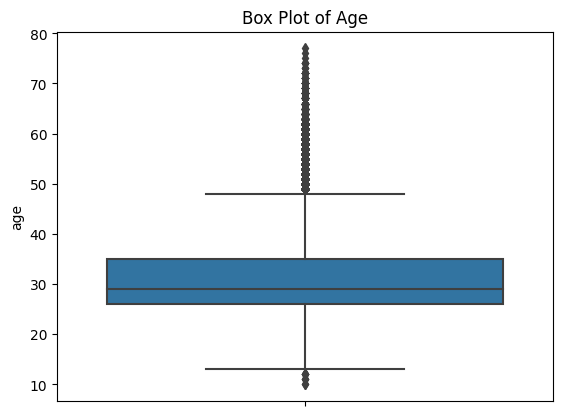

In [15]:
# Create a vertical box plot
sns.boxplot(y=user_info['age'])

# Add a title
plt.title("Box Plot of Age")

# Display the plot
plt.show()

In [16]:
# Create age_segment column using IQR 
# Calculate the quartiles
quartiles = user_info['age'].quantile([0, 0.25, 0.5, 0.75, 1]).tolist()

# Create labels in the format "start-end"
labels = [f"{int(quartiles[i])}-{int(quartiles[i+1])}" for i in range(len(quartiles)-1)]

# Create the age_segment column with 4 groups and age range labels
user_info['age_segment'] = pd.cut(user_info['age'], bins=quartiles, labels=labels, include_lowest=True)

# Check the result
user_info[['age', 'age_segment']].head(10)

,age,age_segment
0,44,35-77
1,39,35-77
2,39,35-77
3,37,35-77
4,38,35-77
5,43,35-77
6,32,29-35
7,59,35-77
8,36,35-77
9,30,29-35


In [17]:
# Check for null values
print(user_info.isnull().sum())

user_id           0
age               0
sex               0
job               0
carrier           0
marital_status    0
age_segment       0
dtype: int64


In [18]:
# Count non-null values and get data types
non_null_counts = user_info.notnull().sum()
dtypes = user_info.dtypes

# Total number of rows
total_rows = len(user_info)

# Create a summary table similar to .info()
info_table = pd.DataFrame({
    'Column': user_info.columns,
    'Non-Null Count': non_null_counts.values,
    'Data Type': dtypes.values
})

# Style the table
styled_info = info_table.style.set_table_styles([
    {'selector': 'th, td', 'props': [('border', '1px solid black')]},
    {'selector': 'th', 'props': [('text-align', 'center')]},
    {'selector': 'table', 'props': [('border-collapse', 'collapse')]}
]).set_properties(**{
    'border': '1px solid black',
    'text-align': 'left'
}).set_properties(subset=['Non-Null Count'], **{
    'text-align': 'center'
})

# Print similar info as .info() header
print(f"<class 'pandas.core.frame.DataFrame'>")
print(f"RangeIndex: {total_rows} entries, 0 to {total_rows - 1}")
print(f"Data columns (total {user_info.shape[1]} columns):")

# Display styled table
styled_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327395 entries, 0 to 327394
Data columns (total 7 columns):


,Column,Non-Null Count,Data Type
0,user_id,327395,int64
1,age,327395,int64
2,sex,327395,object
3,job,327395,object
4,carrier,327395,object
5,marital_status,327395,object
6,age_segment,327395,category


## User_log

In [19]:
# Read data 
user_log = pd.read_csv("/kaggle/input/data-chua-xu-ly/user_log.csv")
user_log.head(10)

,user_id,item_id,cat_id,brand_id,merchant_id,action,datetime
0,328862,323294,833,2661.0,2882,click,2024-08-29
1,328862,844400,1271,2661.0,2882,click,2024-08-29
2,328862,575153,1271,2661.0,2882,click,2024-08-29
3,328862,996875,1271,2661.0,2882,click,2024-08-29
4,328862,1086186,1271,1049.0,1253,click,2024-08-29
5,328862,623866,1271,2661.0,2882,click,2024-08-29
6,328862,542871,1467,2661.0,2882,click,2024-08-29
7,328862,536347,1095,1647.0,883,click,2024-08-29
8,328862,364513,1271,2661.0,2882,click,2024-08-29
9,328862,575153,1271,2661.0,2882,click,2024-08-29


In [20]:
user_log.info()
print(user_log.columns)
print(user_log.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54925330 entries, 0 to 54925329
Data columns (total 7 columns):
 #   Column       Dtype  
---  ------       -----  
 0   user_id      int64  
 1   item_id      int64  
 2   cat_id       int64  
 3   brand_id     float64
 4   merchant_id  int64  
 5   action       object 
 6   datetime     object 
dtypes: float64(1), int64(4), object(2)
memory usage: 2.9+ GB
Index(['user_id', 'item_id', 'cat_id', 'brand_id', 'merchant_id', 'action',
       'datetime'],
      dtype='object')
(54925330, 7)


In [21]:
# Check for null values
print(user_log.isnull().sum())

user_id            0
item_id            0
cat_id             0
brand_id       91015
merchant_id        0
action             0
datetime           0
dtype: int64


In [22]:
# Compare empty brand_id value against brand_id column total
# Total number of rows in the brand_id column (including blanks)
total_brand_rows = user_log['brand_id'].shape[0]

# Number of blank brand_id entries (NaN or empty string)
num_blank_brand = user_log['brand_id'].isna().sum() + (user_log['brand_id'] == '').sum()

# Calculate the percentage
percentage = (num_blank_brand / total_brand_rows) * 100

# Print the result
print(f"Number of blank brand_id entries: {num_blank_brand} / {total_brand_rows} ({percentage:.2f}%)")

Number of blank brand_id entries: 91015 / 54925330 (0.17%)


In [23]:
# Filter rows where brand_id is blank or NaN
blank_brand = user_log[user_log['brand_id'].isna() | (user_log['brand_id'] == '')]

# Count each action trong blank_brand
action_counts_blank = blank_brand['action'].value_counts()

# Count each action trong toàn bộ dữ liệu
action_counts_total = user_log['action'].value_counts()

print("Action counts where brand_id is blank:")
for action, count_blank in action_counts_blank.items():
    count_total = action_counts_total.get(action, 0)
    percent = (count_blank / count_total) * 100 if count_total > 0 else 0
    print(f"- {action}: {count_blank}/{count_total} ({percent:.2f}%)")

Action counts where brand_id is blank:
- add-to-cart: 76579/76750 (99.78%)
- purchase: 14436/3292144 (0.44%)


In [24]:
# Although missing brand_id values only account for 0.17%, they are strongly linked to key actions — 99.78% are add-to-cart and 0.44% are purchase.
# Thus, instead of dropping them, we fill missing brand_id with "unknown" to preserve meaningful behavior data.

In [25]:
# Replace blank or NaN brand_id values with 'unknown'
user_log['brand_id'] = user_log['brand_id'].fillna('')  # Temporarily replace NaN with empty string
user_log.loc[user_log['brand_id'] == '', 'brand_id'] = 'unknown'

In [26]:
missing_by_column = user_log.isna().sum()
print("Number of missing values per column:")
print(missing_by_column)

Number of missing values per column:
user_id        0
item_id        0
cat_id         0
brand_id       0
merchant_id    0
action         0
datetime       0
dtype: int64


In [27]:
# Detect duplicate rows
duplicates = user_log[user_log.duplicated(keep=False)]

# Total rows
total_rows = len(user_log)

# Total duplicate rows
total_duplicated_rows = len(duplicates)

# Percentage of duplicate rows
duplicate_ratio = (total_duplicated_rows / total_rows) * 100 if total_rows > 0 else 0

print(f"Total number of duplicated rows: {total_duplicated_rows} ({duplicate_ratio:.2f}% of total rows)")

# Count the number of each action in duplicate rows
action_counts_dup = duplicates['action'].value_counts()

# Count the number of each action in the entire data
action_counts_total = user_log['action'].value_counts()

print("Action counts in duplicated rows:")
for action, count_dup in action_counts_dup.items(): 
    count_total = action_counts_total.get(action, 0)
    percent = (count_dup / count_total) * 100 if count_total > 0 else 0
    print(f"- {action}: {count_dup}/{count_total} ({percent:.2f}%)")



Total number of duplicated rows: 20597198 (37.50% of total rows)
Action counts in duplicated rows:
- click: 20108112/48550713 (41.42%)
- purchase: 485436/3292144 (14.75%)
- add-to-cart: 3650/76750 (4.76%)


In [28]:
# The 20597198 million duplicate rows could be the result of users clicking, purchasing, or adding the same product to cart multiple times in a day.
# Most of the duplicates are clicks (41.42%), followed by purchases (14.75%), and add to cart actions (4.76%).
# Since this is not a bug, the solution is to leave the duplicate values ​​as they are.

## Train

In [29]:
# Read data
train = pd.read_csv("/kaggle/input/data-chua-xu-ly/train.csv")
train.head()

,user_id,merchant_id,label
0,393595.0,794.0,0.0
1,287580.0,2447.0,0.0
2,203618.0,598.0,0.0
3,143560.0,2030.0,0.0
4,324173.0,1875.0,0.0


In [30]:
# Check data info 
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233782 entries, 0 to 233781
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   user_id      228192 non-null  float64
 1   merchant_id  228284 non-null  float64
 2   label        233782 non-null  float64
dtypes: float64(3)
memory usage: 5.4 MB


In [31]:
# Remove decimal .0
train['user_id'] = train['user_id'].astype('Int64')
train['merchant_id'] = train['merchant_id'].astype('Int64')
train['label'] = train['label'].astype('Int64')
train.head()

,user_id,merchant_id,label
0,393595,794,0
1,287580,2447,0
2,203618,598,0
3,143560,2030,0
4,324173,1875,0


In [32]:
# Count the number of missing values & calculate the percentage in the file
missing_values = train.isnull().sum()
missing_percent = (missing_values / len(train)) * 100

missing_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Missing (%)': missing_percent.round(2)
})

missing_summary

,Missing Values,Missing (%)
user_id,5590,2.39
merchant_id,5498,2.35
label,0,0.00


In [33]:
# Count the number of records for each value in the 'label' column
train['label'].value_counts()

label
0     196138
1      32866
-1      4778
Name: count, dtype: Int64

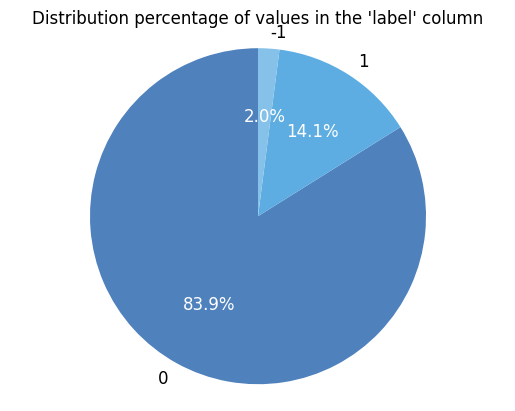

In [34]:
label_percent = train['label'].value_counts(normalize=True) * 100
colors = ["#4F81BD", "#5DADE2", "#85C1E9"]

# Vẽ biểu đồ và lấy các phần tử để chỉnh màu
wedges, texts, autotexts = plt.pie(
    label_percent,
    labels=label_percent.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    textprops={'fontsize': 12}
)

# Đổi màu: nhãn (label) giữ màu đen, phần trăm đổi thành trắng
for text in texts:
    text.set_color('black')
for autotext in autotexts:
    autotext.set_color('white')

plt.title("Distribution percentage of values in the 'label' column")
plt.axis('equal')
plt.show()


In [35]:
# Since the value -1 may be an undefined value, the solution is to leave it as is.

# Visualization and Storytelling

## Demographics analysis

In [36]:
# Count the number of users by gender
sex_counts = user_info["sex"].value_counts().reset_index()
sex_counts.columns = ["sex", "count"]

# Calculate percentage
total = sex_counts["count"].sum()
sex_counts["percentage"] = sex_counts["count"] / total * 100

# Create a display label
sex_counts["label"] = sex_counts["count"].apply(lambda x: f"{x/1000:.2f}K") + " (" + sex_counts["percentage"].round(2).astype(str) + "%)"

# Draw a donut chart
fig = px.pie(sex_counts, names='sex', values='count', hole=0.6, color='sex',
color_discrete_map={"Female": "#1f77b4", "Male": "#003f87", "Unknown": "#ff7f0e"},
title='Count of user_id by sex')

fig.update_traces(textposition='outside', textinfo='label+percent')

# Update image size
fig.update_layout(
showlegend=True,
height=400, 
width=400 
)

fig.show()

In [37]:
# The dataset shows the distribution of users by sex, with 65.6% identified as female, 29.8% as male, and 4.6% unknown. 
# This indicates a dominant female user base and a relatively small proportion of unidentified genders.

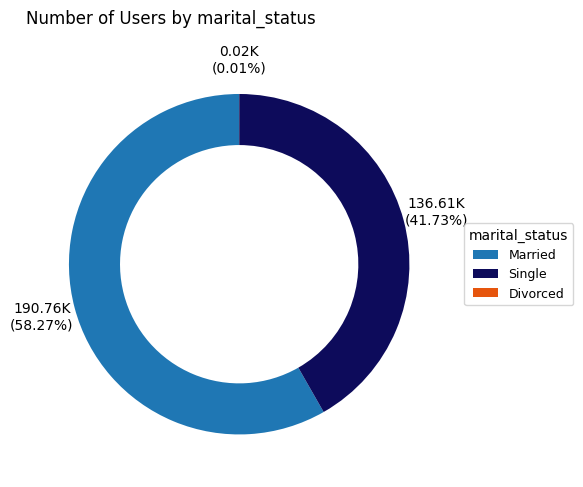

In [38]:
# Plot graph based on variable "marital_status"
# Data
labels = ['Married', 'Single', 'Divorced']
sizes = [190760, 136610, 20]
colors = ['#1f77b4', '#0d0b5b', '#e6550d']  # Light blue, dark blue, orange

# Calculate percentages and formatted labels
total = sum(sizes)
percentages = [size / total * 100 for size in sizes]
formatted_labels = [f"{size/1000:.2f}K\n({percent:.2f}%)" for size, percent in zip(sizes, percentages)]

# Plot
fig, ax = plt.subplots(figsize=(6, 6))
wedges, texts = ax.pie(
    sizes,
    colors=colors,
    startangle=90,
    wedgeprops=dict(width=0.3),  # Thinner ring like in the image
    labels=None
)

# Add labels outside the donut
for i, wedge in enumerate(wedges):
    angle = (wedge.theta2 - wedge.theta1) / 2 + wedge.theta1
    x = 1.2 * np.cos(np.deg2rad(angle))
    y = 1.2 * np.sin(np.deg2rad(angle))
    ax.text(x, y, formatted_labels[i], ha='center', va='center', fontsize=10)

# Title
plt.title("Number of Users by marital_status", fontsize=12, loc='left', pad=20)

# Legend on the right side
plt.legend(
    wedges,
    labels,
    title="marital_status",
    loc="center right",
    bbox_to_anchor=(1.3, 0.5),
    fontsize=9,
    title_fontsize=10
)

plt.tight_layout()
plt.show()

In [39]:
# The dataset shows the distribution of users by marital status: 58.27% are married, 41.73% are single, and only 0.01% are divorced. 
# This suggests that the majority of users are married, with very few divorced individuals. 
# Users who are married tend to purchase more frequently, possibly due to higher household spending needs or more stable financial conditions.

In [40]:
# Plot the graph by the variable "carrier"
# Sort carrier_counts in descending order to assign darkest blue to highest count
carrier_counts = user_info.groupby('carrier', observed=False)['user_id'].nunique().reset_index(name='count')
carrier_counts_sorted = carrier_counts.sort_values("count", ascending=False).reset_index(drop=True)

# Define a list of blue shades from dark to light
blue_shades = ['#1f77b4', '#3f8fca', '#6fb0dd', '#a3d2f3', '#c9e5fa']

# If there are more carriers than shades, extend the last shade
if len(carrier_counts_sorted) > len(blue_shades):
    blue_shades += [blue_shades[-1]] * (len(carrier_counts_sorted) - len(blue_shades))

# Draw the pie chart using sorted data and assigned colors
fig = px.pie(carrier_counts_sorted,
             names="carrier",
             values="count",
             hole=0.4,
             color_discrete_sequence=blue_shades)

# Add percentage and label info on the slices
fig.update_traces(textinfo="percent+label", pull=[0.05] * len(carrier_counts_sorted))

# Customize layout and center the title
fig.update_layout(
    height=600,
    title_text="User Distribution by Carrier",
    title_font_size=20,
    title_x=0.5,  # Center the title
    showlegend=False
)

fig.show()



In [41]:
# The user distribution by mobile carrier is nearly even, with Vinaphone (20.1%), Vietnamobile (19.9%), Viettel (20%), Mobiphone (20%), and other carriers (20%).
# This suggests that purchasing behavior is fairly consistent across the four major mobile carriers.

In [42]:
# Plot the graph by the variable "age_segment"
age_counts = user_info["age_segment"].value_counts().reset_index()
age_counts.columns = ["age_segment", "count"]

ordered_age_segments = ["10-26", "26-29", "29-35", "35-77"]
age_counts["age_segment"] = pd.Categorical(age_counts["age_segment"], categories=ordered_age_segments, ordered=True)
age_counts = age_counts.sort_values("age_segment")

fig = px.bar(
    age_counts, 
    x="age_segment", 
    y="count", 
    title="Number of Users by age_segment", 
    labels={"count": "Count of user_id", "age_segment": "Age Segment"}, 
    text=age_counts["count"].apply(lambda x: f"{x/1000:.0f}K"), 
    height=600,  # height in pixels (6 inch)
    width=1000   # width in pixels (10 inch)
)

fig.update_traces(marker_color="#1f77b4", textposition="outside")

# Remove background
fig.update_layout(
    yaxis_title="Count of user_id", 
    xaxis_title="Age Segment", 
    uniformtext_minsize=8, 
    uniformtext_mode='hide',
    plot_bgcolor='white',  
    paper_bgcolor='white'  
)

fig.show()


In [43]:
# Uneven age distribution
# The 10–26 age group is the largest (~32% of the total), showing that this is a young group with a large proportion.
# The 26–29 group is quite small, only ~20% of the 10–26 group, although the gap is not much → this group is too narrow.
# The 35–77 group is very large (42 years old), but is smaller than the 10–26 group, showing that the elderly user population is quite small.
# This indicates that younger users (under 27) make up the largest segment, suggesting they are a key target for marketing campaigns.

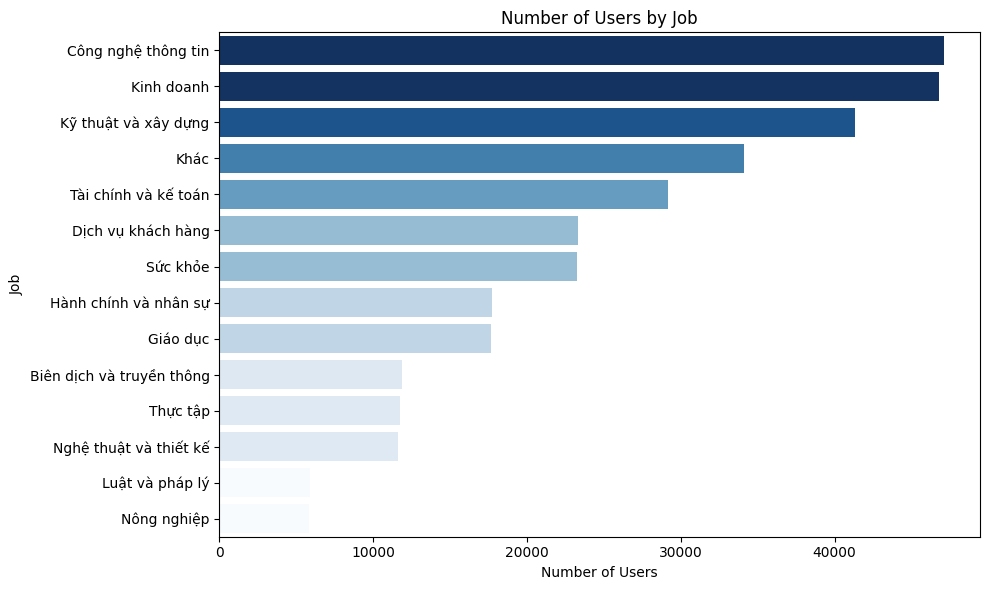

In [44]:
# Number of Users by Job
job_counts = user_info.groupby('job')['user_id'].nunique().reset_index()
job_counts.columns = ['job', 'user_count']

# Sort job_counts by user_count descending
job_counts = job_counts.sort_values(by='user_count', ascending=False)

# Normalize user_count để tạo gradient màu
norm = plt.Normalize(job_counts['user_count'].min(), job_counts['user_count'].max())
colors = plt.cm.Blues(norm(job_counts['user_count']))

# Draw a horizontal bar chart with custom colors
plt.figure(figsize=(10, 6))
sns.barplot(data=job_counts, y='job', x='user_count', palette=colors)

# Customize charts
plt.xlabel('Number of Users')
plt.ylabel('Job')
plt.title('Number of Users by Job')
plt.tight_layout()
plt.show()

In [45]:
# df1 is the user_id link of 2 files user_log and user_id and only includes 3 columns including: user_id, age_segment, action

In [46]:
# Merge 2 DataFrames by 'user_id'
df1 = pd.merge(user_log, user_info[['user_id', 'age_segment']], on='user_id', how='inner')

# Select 3 columns to create df1
df1 = df1[['user_id', 'age_segment', 'action']]

## Customer Behaviors based on Demographics

In [47]:
# Create a dataframe of users who made a purchase, including their info and behavior
# Create "label" column in user_log dataframe 
purchase = user_log[user_log['action'] == 'purchase'].copy()
first_purchase = (
    purchase.groupby("user_id")["datetime"]
    .min()
)

purchase["is_new_customer"] = (purchase["datetime"] == purchase["user_id"].map(first_purchase)).astype(int)

# Left join user demographic information into the purchase table
purchase = purchase.merge(
    user_info[["user_id", "age_segment", "sex", "marital_status", "carrier", "job"]],
    on="user_id",
    how="left"
)

In [48]:
# Number of Purchases by Age Segment
df_purchase = df1[df1['action'] == 'purchase']
purchase_by_age = df_purchase.groupby('age_segment',observed=False).size().reset_index(name='num_purchases')

blues_dark = px.colors.sequential.Blues[3:]

fig = px.bar( 
purchase_by_age, 
x='age_segment', 
y='num_purchases', 
title='Number of Purchases by Age Segment', 
labels={'age_segment': 'Age Segment', 'num_purchases': 'Number of Purchases'}, 
color='age_segment', 
color_discrete_sequence=blues_dark
)

fig.update_layout( 
xaxis_tickangle=-45, 
bargap=0.4, 
width=600, 
height=400
)

fig.show()


In [49]:
# Although users aged 10–26 represent the largest group, they do not make the most purchases. 
# The 29–35 age segment shows the highest number of purchases, followed by 35–77, 10–26, and lastly 26–29.
# This indicates that users aged 29–35 are the most active buyers, suggesting a higher purchasing power or stronger buying intent in this age group.

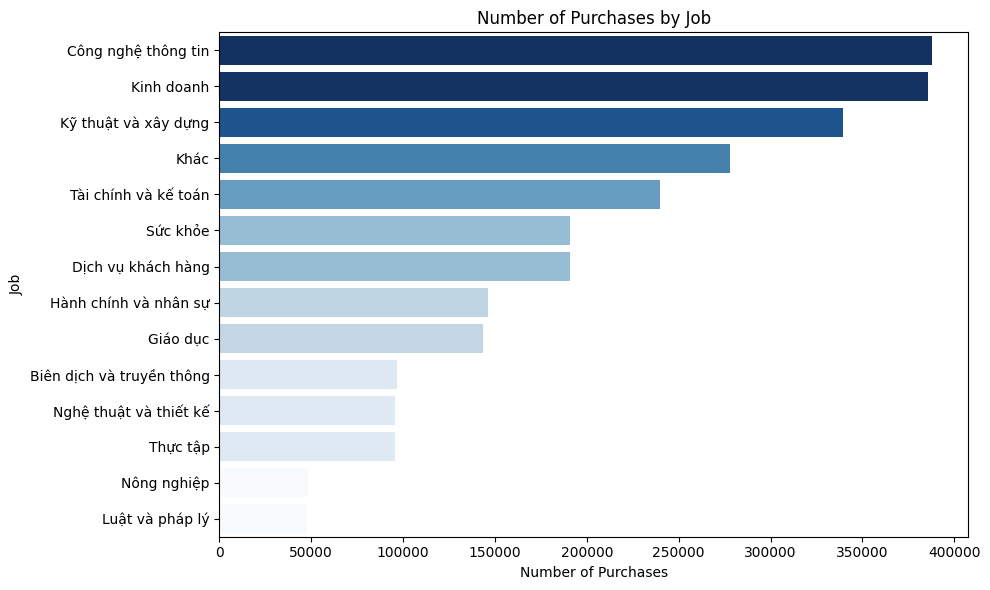

In [50]:
# Number of Purchases by Job
job_purchase = purchase.groupby('job')['user_id'].count().reset_index()
job_purchase = job_purchase.rename(columns={'user_id': 'purchase_count'})

job_purchase = job_purchase.sort_values(by='purchase_count', ascending=False)

norm = plt.Normalize(job_purchase['purchase_count'].min(), job_purchase['purchase_count'].max())
colors = plt.cm.Blues(norm(job_purchase['purchase_count']))

plt.figure(figsize=(10, 6))
sns.barplot(data=job_purchase, y='job', x='purchase_count', palette=colors)

# Customize charts
plt.xlabel('Number of Purchases')
plt.ylabel('Job')
plt.title('Number of Purchases by Job')
plt.tight_layout()
plt.show()

In [51]:
# The top three industries in terms of purchases are: Information Technology, Business, Engineering and Construction
# These are all industries that have the following characteristics in common:
## Higher than average income,
## Regular access to technology,
## High level of digital engagement,
# => leading to higher purchasing power, especially on online platforms.
# This shows that your main customer base belongs to the group with modern, professional and high-tech lifestyles, often in urban areas.
# Therefore:
## Marketing strategies should focus on industries with high purchasing power: IT, business, engineering.
## Groups with lower purchasing power should not be completely ignored, but can be exploited with market education campaigns or content personalization.

## Customer Behaviors based on datetime

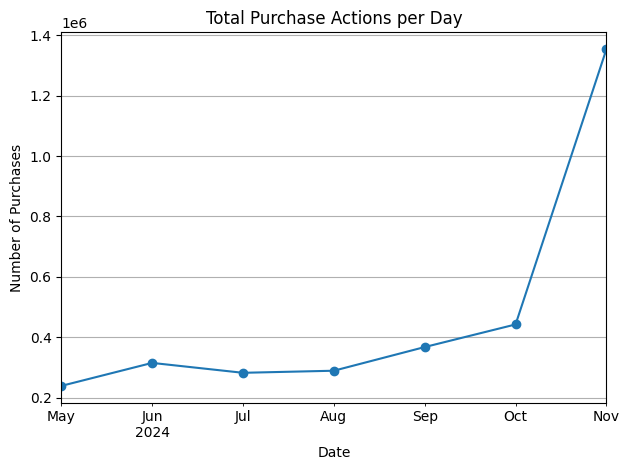

In [52]:
# Purchasing Trend 
user_log['datetime'] = pd.to_datetime(user_log['datetime'], errors='coerce')
purchase = user_log[user_log['action'] == 'purchase'].copy()

purchase['month'] = purchase['datetime'].dt.to_period('M')
purchase_by_month = purchase.groupby('month').size()

purchase_by_month.plot(kind='line', marker='o')
plt.title('Total Purchase Actions per Day')
plt.xlabel('Date')
plt.ylabel('Number of Purchases')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

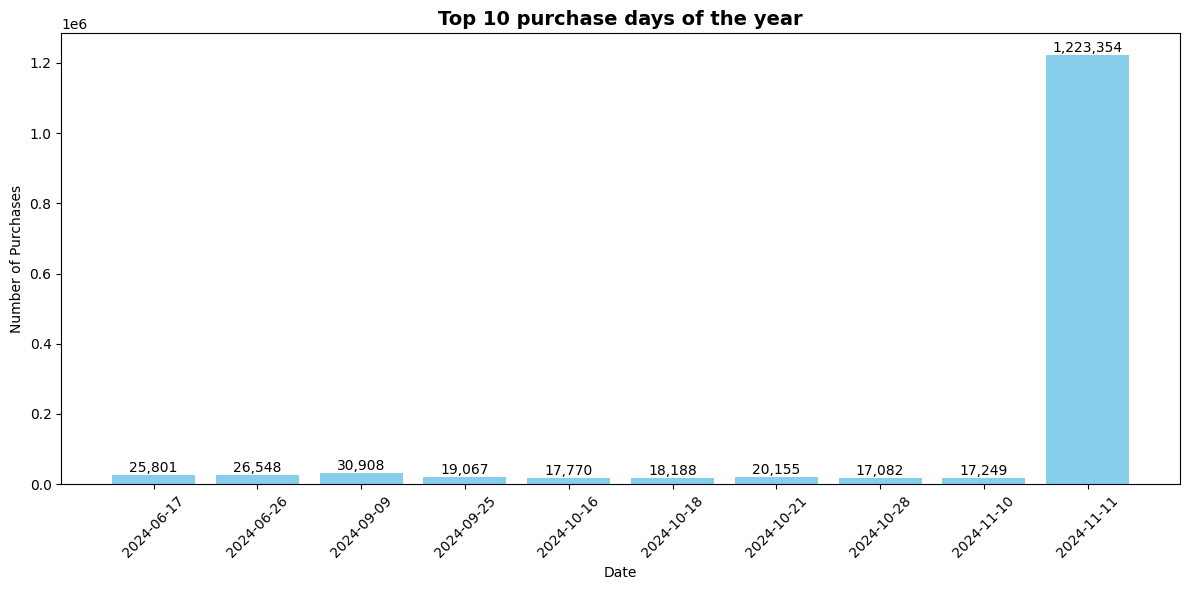

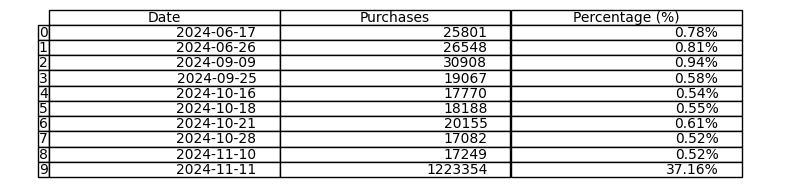

In [53]:
# Top 10 purchase days of the year
# Filter only 'purchase' actions
purchase_data = user_log[user_log['action'] == 'purchase']

# Count purchases per date
purchase_counts = purchase_data['datetime'].value_counts()

# Get top 10 dates with the highest number of purchases
top10 = purchase_counts.sort_values(ascending=False).head(10).sort_index()

# Calculate total and percentage
total_purchases = purchase_counts.sum()
percentages = (top10 / total_purchases * 100).round(2)

# Prepare DataFrame for the table
table_data = {
    'Date': top10.index.strftime('%Y-%m-%d'),
    'Purchases': top10.values,
    'Percentage (%)': [f"{p}%" for p in percentages]
}
df_table = pd.DataFrame(table_data)

# Function to plot bar chart with value labels
def plot_bar_chart(top10):
    fig, ax = plt.subplots(figsize=(12, 6))
    dates = top10.index.strftime('%Y-%m-%d')
    values = top10.values

    bars = ax.bar(dates, values, color='skyblue')

    # Add value labels on top of each bar
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height,
                f'{height:,}', ha='center', va='bottom', fontsize=10)

    ax.set_title('Top 10 purchase days of the year', fontsize=14, fontweight='bold')
    ax.set_xlabel('Date')
    ax.set_ylabel('Number of Purchases')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Function to display summary table
def plot_table(df_table):
    fig, ax = plt.subplots(figsize=(8, 2))
    ax.axis('off')  # Hide axes
    table(ax, df_table, loc='center', colWidths=[0.3]*3)
    plt.tight_layout()
    plt.show()

# Call plotting functions
plot_bar_chart(top10)
plot_table(df_table)


In [54]:
# Out of the 10 days with the highest purchase volume, only 2 days are double days, so even though double days have more promotional offers, 
# customers still do not tend to shop on those days.
# So if customers do not shop on double days, which days will customers shop on?

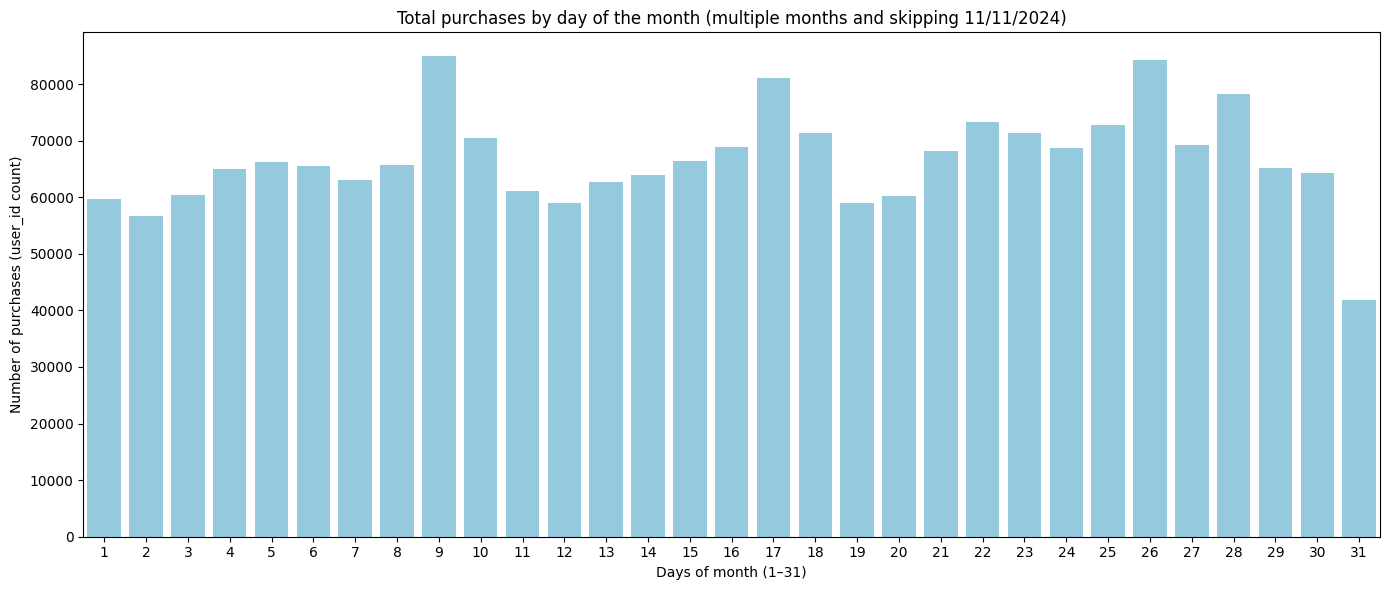

In [55]:
# Extract the 'day' part from datetime (values ​​from 1 to 31), convert to string
purchase['day_str'] = purchase['datetime'].dt.day.astype(str)

purchase_ = purchase[~((purchase['datetime'].dt.day == 11) & (purchase['datetime'].dt.month == 11))]

# Group by day and count the number of user_ids
purchase_per_day = purchase_.groupby('day_str')['user_id'].count().reset_index(name='num_purchases')

# Sort by day (convert back to number to sort)
purchase_per_day['day_str'] = purchase_per_day['day_str'].astype(int)
purchase_per_day = purchase_per_day.sort_values('day_str')
purchase_per_day['day_str'] = purchase_per_day['day_str'].astype(str) # Change string to make x label prettier

# Plot the chart
plt.figure(figsize=(14, 6))
sns.barplot(data=purchase_per_day, x='day_str', y='num_purchases', color='skyblue')

plt.title("Total purchases by day of the month (multiple months and skipping 11/11/2024)")
plt.xlabel("Days of month (1–31)")
plt.ylabel("Number of purchases (user_id count)")
plt.tight_layout()
plt.show()

In [56]:
# The chart omitted 11/11/2024, showing that customers do not tend to buy on double days but tend to buy on 9, 17 and 26 in the month, possibly due to salary/bonus days (mid- and end-of-month)
# So we can take advantage of peak days (9, 17, 26) to:
## Run limited-time promotions → increase sales quickly.
## Send notifications/promos to boost purchases at the right time.
## Launch new products on the day with the most traffic.#
## Increase advertising budget on these days to optimize efficiency.

In [57]:
# df2 is the user_id link of 2 files user_log and user_info and only includes 4 columns: user_id, action, sex, age_segment, datetime

In [58]:
# Create df2 with only 4 to calculate conversion rate
# Merge 2 tables by user_id column
df2 = pd.merge(user_log, user_info, on='user_id', how='inner')

# Select required columns
df2 = df2[['user_id', 'action', 'sex', 'age_segment', 'datetime']]

In [59]:
print(f"Number of rows: {df2.shape[0]}")
print(f"Number of columns: {df2.shape[1]}")

Number of rows: 44644363
Number of columns: 5


## Customer Behavior based on "action" and Conversion rate

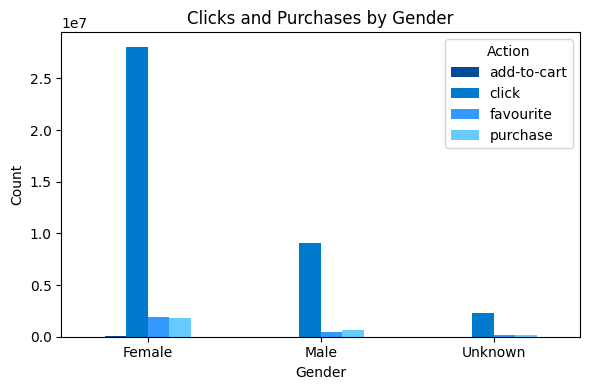

In [60]:
# Clicks and Purchases by Gender
sex_action_table = df2.groupby(['sex', 'action']).size().unstack(fill_value=0)

colors = ['#004c99', '#007acc', '#3399ff', '#66ccff']
# Plot bar chart with blue gradient
sex_action_table.plot(
    kind='bar',
    figsize=(6, 4),
    color=colors[:len(sex_action_table.columns)]  # auto-adjust to column count
)

plt.title('Clicks and Purchases by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Action')
plt.tight_layout()
plt.show()

In [61]:
# Women dominate all behaviors: clicks, add to cart, favorites, and purchases.
# Men and the gender-unknown group interact significantly less.

action       add-to-cart     click  favourite  purchase
age_segment                                            
10-26              14987  10268010     759802    663888
26-29              10222   7419101     508061    491342
29-35              13728  11398409     658663    841032
35-77              12778  10348870     545309    690161


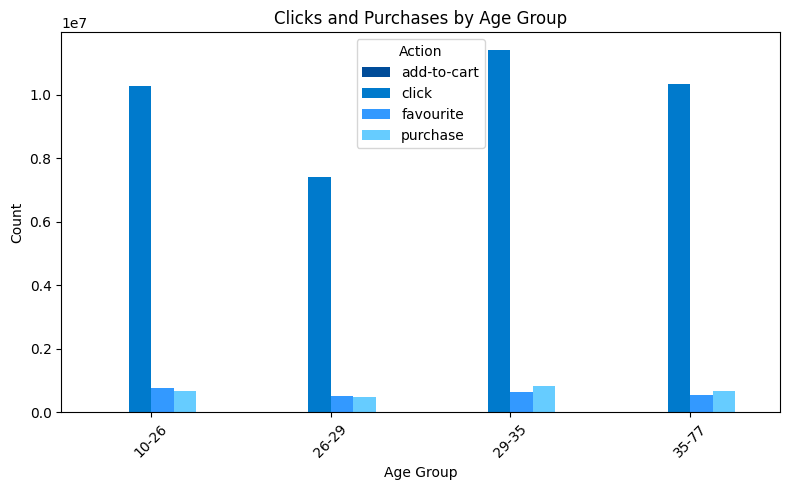

In [62]:
# Clicks and Purchases by Age Group
age_action_table = df2.groupby(['age_segment', 'action'], observed=False).size().unstack(fill_value=0)
print(age_action_table)

colors = ['#004c99', '#007acc', '#3399ff', '#66ccff']
# Plot
age_action_table.plot(kind='bar', figsize=(8, 5), color=colors[:len(age_action_table.columns)])
plt.title('Clicks and Purchases by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Action')
plt.tight_layout()
plt.show()

In [63]:
# The 29–35 age group has the highest number of clicks and purchases even though the number of users is not the largest 
## → They have a high conversion rate.

# The 10–26 age group has the largest number of users, many clicks, but the number of purchases is not correspondingly high 
## → High search behavior, but not many purchases.

# The 26–29 age group has the lowest performance in both purchases and ratio compared to the number of users.

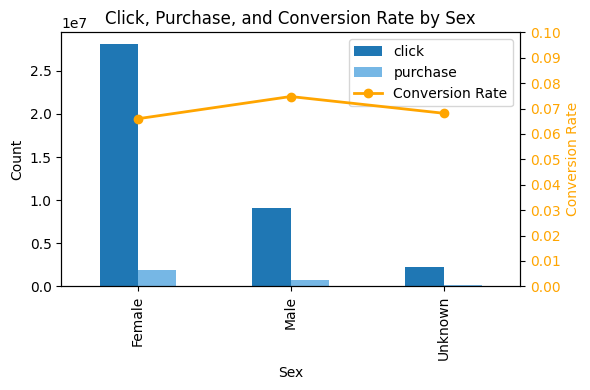

In [64]:
# Click, Purchase, and Conversion Rate by Sex
# Filter only click or purchase actions
filtered = df2[df2['action'].isin(['click', 'purchase'])]

# Group by sex and action, then compute counts and conversion rate
sex_action = (
    filtered.groupby(['sex', 'action']).size().unstack(fill_value=0)
)
sex_action['conversion_rate'] = (
    sex_action['purchase'] / sex_action['click']
).fillna(0)

# Plot
fig, ax1 = plt.subplots(figsize=(6, 4))

# Define blue color gradient
colors = ['#1f77b4', '#76b7e5']  # dark blue for click, lighter blue for purchase

# Bar chart with custom blue shades
sex_action[['click', 'purchase']].plot(kind='bar', ax=ax1, color=colors)
ax1.set_ylabel('Count')
ax1.set_xlabel('Sex')
ax1.set_title('Click, Purchase, and Conversion Rate by Sex')

# Conversion rate line chart
ax2 = ax1.twinx()
ax2.plot(
    sex_action.index,
    sex_action['conversion_rate'],
    color='orange',
    marker='o',
    linewidth=2,
    label='Conversion Rate'
)
ax2.set_ylabel('Conversion Rate', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')
ax2.set_ylim(0, 0.1)
ax2.set_yticks([i / 100 for i in range(11)])

# Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

plt.tight_layout()
plt.show()

In [65]:
# Females account for the largest share of clicks and purchases. However, their conversion rate (conversion rate = purchase / click) is not the highest.
# Males have a much lower number of clicks than females, but the highest conversion rate (~8%).
# Unknown gender has relatively low behavior in both clicks and purchases, and the conversion rate is also low (~7%).

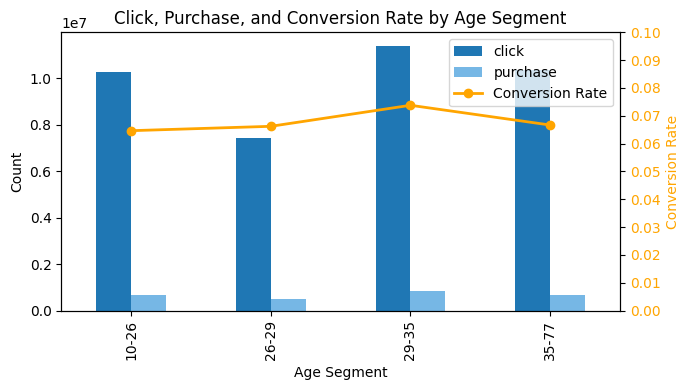

In [66]:
# Click, Purchase, and Conversion Rate by Age Segment
# Filter for click or purchase actions
filtered = df2[df2['action'].isin(['click', 'purchase'])]

# Group by age segment and action
age_action = (
    filtered.groupby(['age_segment', 'action'], observed=False).size().unstack(fill_value=0)
)

# Calculate conversion rate
age_action['conversion_rate'] = (
    age_action['purchase'] / age_action['click']
).fillna(0)

# Show result table (optional)
age_action

# Plot
fig, ax1 = plt.subplots(figsize=(7, 4))

# Define blue gradient colors
colors = ['#1f77b4', '#76b7e5']  # Dark blue for 'click', light blue for 'purchase'

# Bar chart with custom blue shades
age_action[['click', 'purchase']].plot(
    kind='bar', ax=ax1, color=colors
)
ax1.set_ylabel('Count')
ax1.set_xlabel('Age Segment')
ax1.set_title('Click, Purchase, and Conversion Rate by Age Segment')

# Conversion rate line chart
ax2 = ax1.twinx()
ax2.plot(
    age_action.index,
    age_action['conversion_rate'],
    color='orange',
    marker='o',
    linewidth=2,
    label='Conversion Rate'
)
ax2.set_ylabel('Conversion Rate', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')
ax2.set_ylim(0, 0.1)
ax2.set_yticks([i / 100 for i in range(11)])

# Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

plt.tight_layout()
plt.show()

In [67]:
#The 29–35 age group stands out across the board in terms of clicks, purchases, and conversion rates.
#The 10–26 age group clicks more but has lower conversion rates.
#The 35–77 age group clicks less but has a higher purchase rate.
#The 26–29 age group interacts and purchases the least, but the conversion rate is still stable.

In [68]:
df2['datetime'] = pd.to_datetime(df2['datetime'])

# Sort by user and time
df2 = df2.sort_values(by=['user_id', 'datetime'])

# For each user, count the number of clicks before each purchase
def count_clicks_before_purchase(df): 
    click_count = 0 
    click_list = [] 
    for _, row in df.iterrows(): 
        if row['action'] == 'click': 
            click_count += 1 
        elif row['action'] == 'purchase': 
            click_list.append(click_count) 
            click_count = 0  # reset after purchase 
    return click_list

# Get a list of the number of clicks before each purchase for each user
clicks_before_purchase = df2.groupby('user_id').apply(count_clicks_before_purchase)

# Combine all values into one list
all_clicks = [click for sublist in clicks_before_purchase for click in sublist]

# Calculate average clicks before purchase
avg_clicks_before_purchase = sum(all_clicks) / len(all_clicks) if all_clicks else 0
print(f"Average clicks before each purchase: {avg_clicks_before_purchase:.2f}")

/tmp/ipykernel_146/657415897.py:19: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



Average clicks before each purchase: 13.61


In [69]:
# Highly considered shopping behavior → customers do not buy at first sight but need to approach many times.
# There are customers who click many times but still do not buy the product or look very carefully before deciding to buy

## Returning customers and Deal Hunters

In [70]:
# Create a dataframe of users who made a purchase, including their info and behavior
# Create "label" column in user_log dataframe 
purchase = user_log[user_log['action'] == 'purchase'].copy()
first_purchase = (
    purchase.groupby("user_id")["datetime"]
    .min()
)

purchase["is_new_customer"] = (purchase["datetime"] == purchase["user_id"].map(first_purchase)).astype(int)

# Left join user demographic information into the purchase table
purchase = purchase.merge(
    user_info[["user_id", "age_segment", "sex", "marital_status", "carrier", "job"]],
    on="user_id",
    how="left"
)

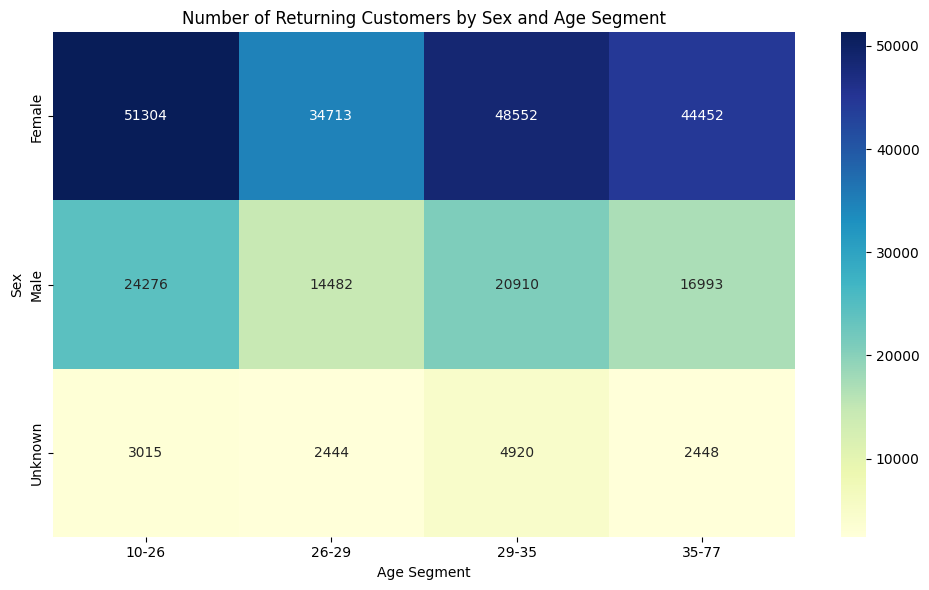

In [71]:
# Number of Returning Customers by Sex and Age Segment

non_returning = purchase[purchase['is_new_customer'] == 0]

pivot_table = (
    non_returning
    .groupby(['sex', 'age_segment'], observed=False)['user_id']
    .nunique()
    .unstack(fill_value=0)  
)

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='YlGnBu')

plt.title('Number of Returning Customers by Sex and Age Segment')
plt.xlabel('Age Segment')
plt.ylabel('Sex')
plt.tight_layout()
plt.show()

In [72]:
# Female customers are the largest and most consistent group of returning customers across all age segments.
# The younger age group (10–26) has the highest number of returning customers, reflecting strong purchasing power.
# Gender and age differences can help shape marketing strategies, with a focus on targeting female customers.

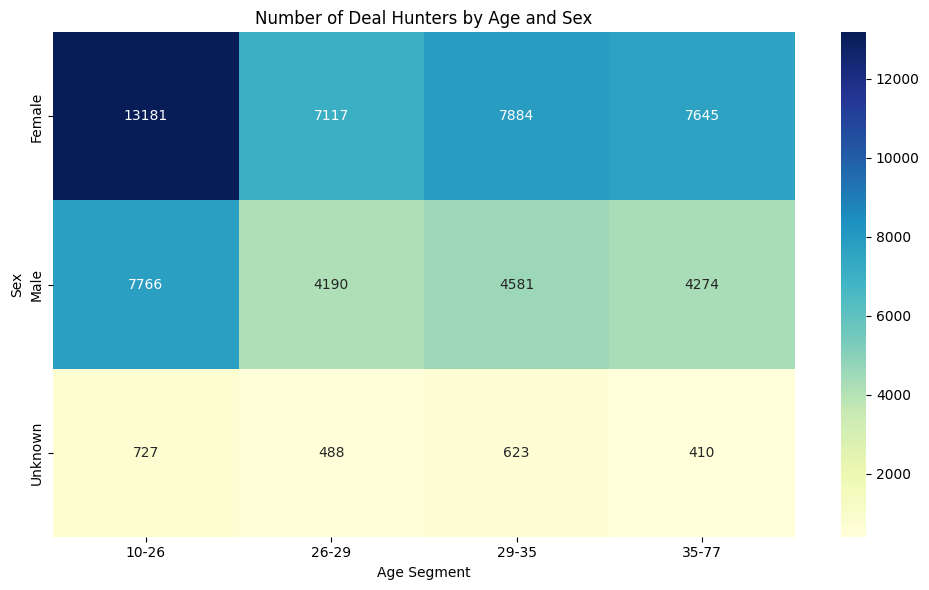

In [73]:
# Number of Deal Hunters by Age and Gender
only_new_customers = purchase.groupby('user_id')['is_new_customer'].apply(lambda x: x.nunique() == 1 and x.iloc[0] == 1)

user_ids_only_new = only_new_customers[only_new_customers].index.tolist()
special_dates = [
    "2024-06-06", "2024-07-07", "2024-08-08", 
    "2024-09-09", "2024-10-10", "2024-11-11", 
    "2024-08-18", "2024-10-20"
]
special_dates = pd.to_datetime(special_dates).date 

purchase_only_new = purchase[
    (purchase['user_id'].isin(user_ids_only_new)) &
    (purchase['datetime'].dt.date.isin(special_dates))
]

pivot_table = (
    purchase_only_new
    .groupby(['sex', 'age_segment'], observed=False)['user_id']
    .nunique()
    .unstack(fill_value=0)  
)

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='YlGnBu')

plt.title('Number of Deal Hunters by Age and Sex')
plt.xlabel('Age Segment')
plt.ylabel('Sex')
plt.tight_layout()
plt.show()

In [74]:
# Female customers make more promotional purchases than males, especially in the younger age group (10–26).
# The younger age group (10–26) shows the strongest deal purchasing power, enjoying discounts and promotions.
# The number of deal hunters decreases with age, indicating that older age groups are less interested in deals.

## Cohort Analysis

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning:

invalid value encountered in less

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning:

invalid value encountered in less



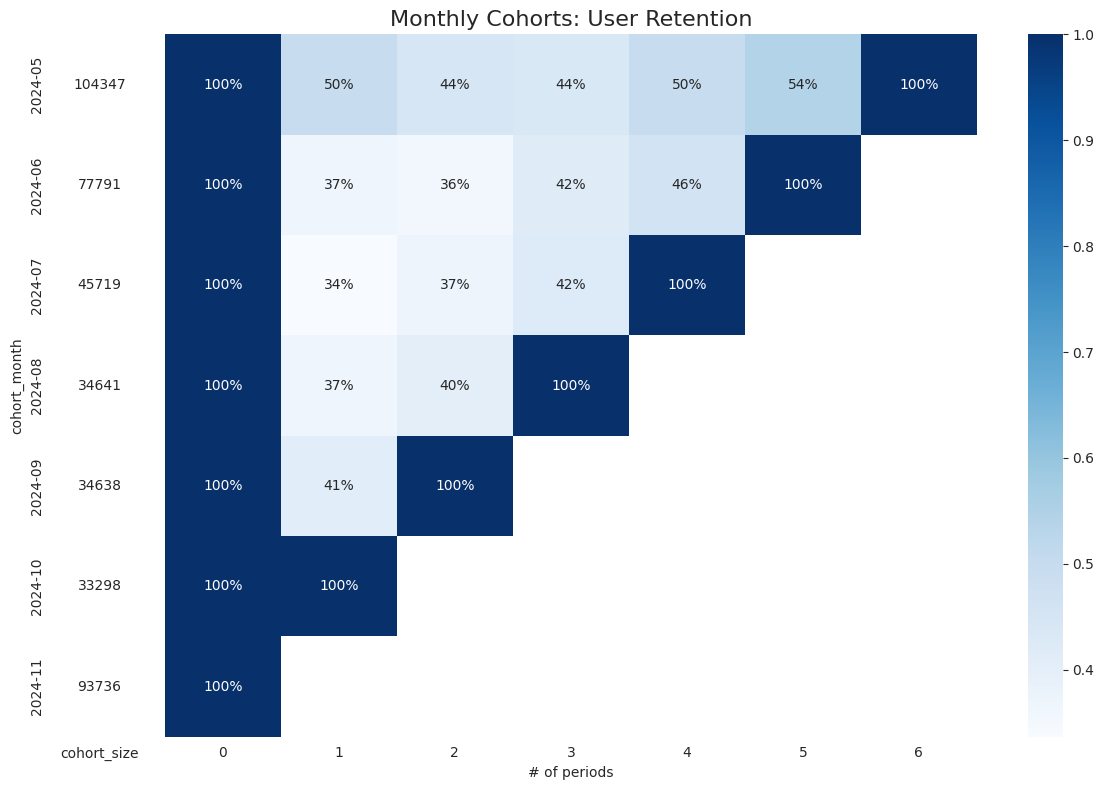

In [75]:
# Calculate and visualize user retention cohorts over time based on purchase activity
cohort = user_log[user_log['action'] == 'purchase'].copy()
cohort['order_month'] = cohort['datetime'].dt.to_period('M')
cohort['cohort_month'] = cohort.groupby('user_id')['datetime'].transform('min').dt.to_period('M')

cohort_users = cohort.groupby('cohort_month')['user_id'].unique().to_dict()

records = []
for cohort_month, users in cohort_users.items():
    for period in range((cohort['order_month'].max() - cohort_month).n + 1):
        period_month = cohort_month + period
        active_users = cohort[
            (cohort['cohort_month'] == cohort_month) &
            (cohort['order_month'] == period_month) &
            (cohort['user_id'].isin(users))
        ]['user_id'].nunique()
        records.append({
            'cohort_month': cohort_month,
            'order_month': period_month,
            'period_number': period,
            'n_users': active_users
        })

df_cohort = pd.DataFrame(records)

cohort_pivot = df_cohort.pivot_table(index='cohort_month', columns='period_number', values='n_users')
cohort_size = cohort_pivot.iloc[:, 0]
retention_matrix = cohort_pivot.divide(cohort_size, axis=0)

with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={'width_ratios': [1, 11]})

    # Heatmap retention - chỉnh cmap thành 'Blues' (xanh navy)
    sns.heatmap(retention_matrix, mask=retention_matrix.isnull(), annot=True, fmt='.0%', cmap='Blues', ax=ax[1])
    ax[1].set_title('Monthly Cohorts: User Retention', fontsize=16)
    ax[1].set(xlabel='# of periods', ylabel='')

    # Cohort size
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df, annot=True, cbar=False, fmt='g', cmap=white_cmap, ax=ax[0])

    fig.tight_layout()

In [76]:
# The retention rate fluctuates between 34% – 50%, higher than the e-commerce industry average.
# November 11 is a major shopping day (Singles' Day), combining with effective marketing strategies that helped drive the retention rate close to 100% during November.
# This highlights the success of the campaign and shows that strategic promotions and large-scale sale events can significantly boost customer return rates.